In [1]:
#Project Task: Week 1
#Data Exploration:

##In order to explore we need to import the data first...hence lets use pandas to do that
import pandas as pd
import numpy as np
data = pd.read_csv('health care diabetes.csv')

In [2]:
#1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make
#sense and thus indicates missing value:
#• Glucose
#• BloodPressure
#• SkinThickness
#• Insulin
#• BMI

##it is given that missing values were already replaced with zero, lets check for anymore null values in the dataset.
data.head(6)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0

In [3]:
data.dtypes ##datatypes of the columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data.isnull().sum() ##Lets see if there are any null values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.isna().sum() ##Lets see if there are any na's in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.iloc[:,1:6] ##it is clear there's no default null or na so now lets look at the five columns the missing values are updated as 0

Glucose  BloodPressure  SkinThickness  Insulin   BMI
0        148             72             35        0  33.6
1         85             66             29        0  26.6
2        183             64              0        0  23.3
3         89             66             23       94  28.1
4        137             40             35      168  43.1
..       ...            ...            ...      ...   ...
763      101             76             48      180  32.9
764      122             70             27        0  36.8
765      121             72             23      112  26.2
766      126             60              0        0  30.1
767       93             70             31        0  30.4

[768 rows x 5 columns]

In [7]:
data.iloc[:,1:6] = data.iloc[:,1:6].replace(0,np.nan) ##As 0 doesn't make any sense in these 5 features replacing with NaN
data.iloc[:,1:6]

Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148.0           72.0           35.0      NaN  33.6
1       85.0           66.0           29.0      NaN  26.6
2      183.0           64.0            NaN      NaN  23.3
3       89.0           66.0           23.0     94.0  28.1
4      137.0           40.0           35.0    168.0  43.1
..       ...            ...            ...      ...   ...
763    101.0           76.0           48.0    180.0  32.9
764    122.0           70.0           27.0      NaN  36.8
765    121.0           72.0           23.0    112.0  26.2
766    126.0           60.0            NaN      NaN  30.1
767     93.0           70.0           31.0      NaN  30.4

[768 rows x 5 columns]

In [8]:
## we cannot model the data with NaN's so we need to fill with best possible data for which we are using KNNImputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

imputed_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

In [9]:
data.describe() ##much closer look at the data...there were no zeroes as min value in those 5 features now

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#2. Visually explore these variables using histograms. Treat the missing values accordingly.

##we have already looked at the data and there are no missing values or bad data, Now we will plot all variables in histograms


C:\Users\pavan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pavan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


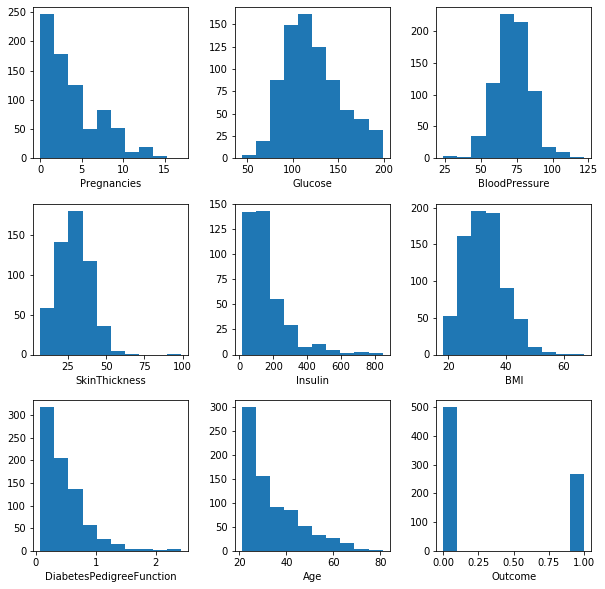

In [11]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), gridspec_kw={'wspace': 0.3,'hspace': 0.3}) 
k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(data.iloc[:,k])
        ax[i][j].set(xlabel=data.columns[k])
        k = k + 1
plt.show() 

##3x3 grid of all 9 variables in histograms

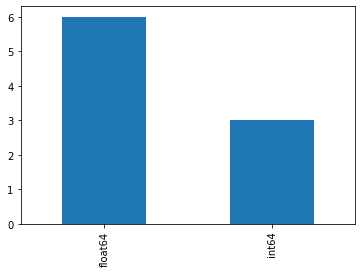

In [12]:
#3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count 
#of variables.

## For the above requirement we will create a bar graph between frequency of outcome over dtypes
## As we have seen earlier we have 7 int and 2 float features but now after the imputation we have 4 more float features
data.dtypes.value_counts().plot(kind = 'bar')
plt.show()

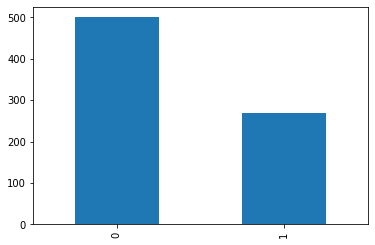

In [13]:
#Project Task: Week 2
#Data Exploration:
#1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

##Plotting a graph between frequency of 0,1 in outcome
data.Outcome.value_counts().plot(kind = 'bar')
plt.show()

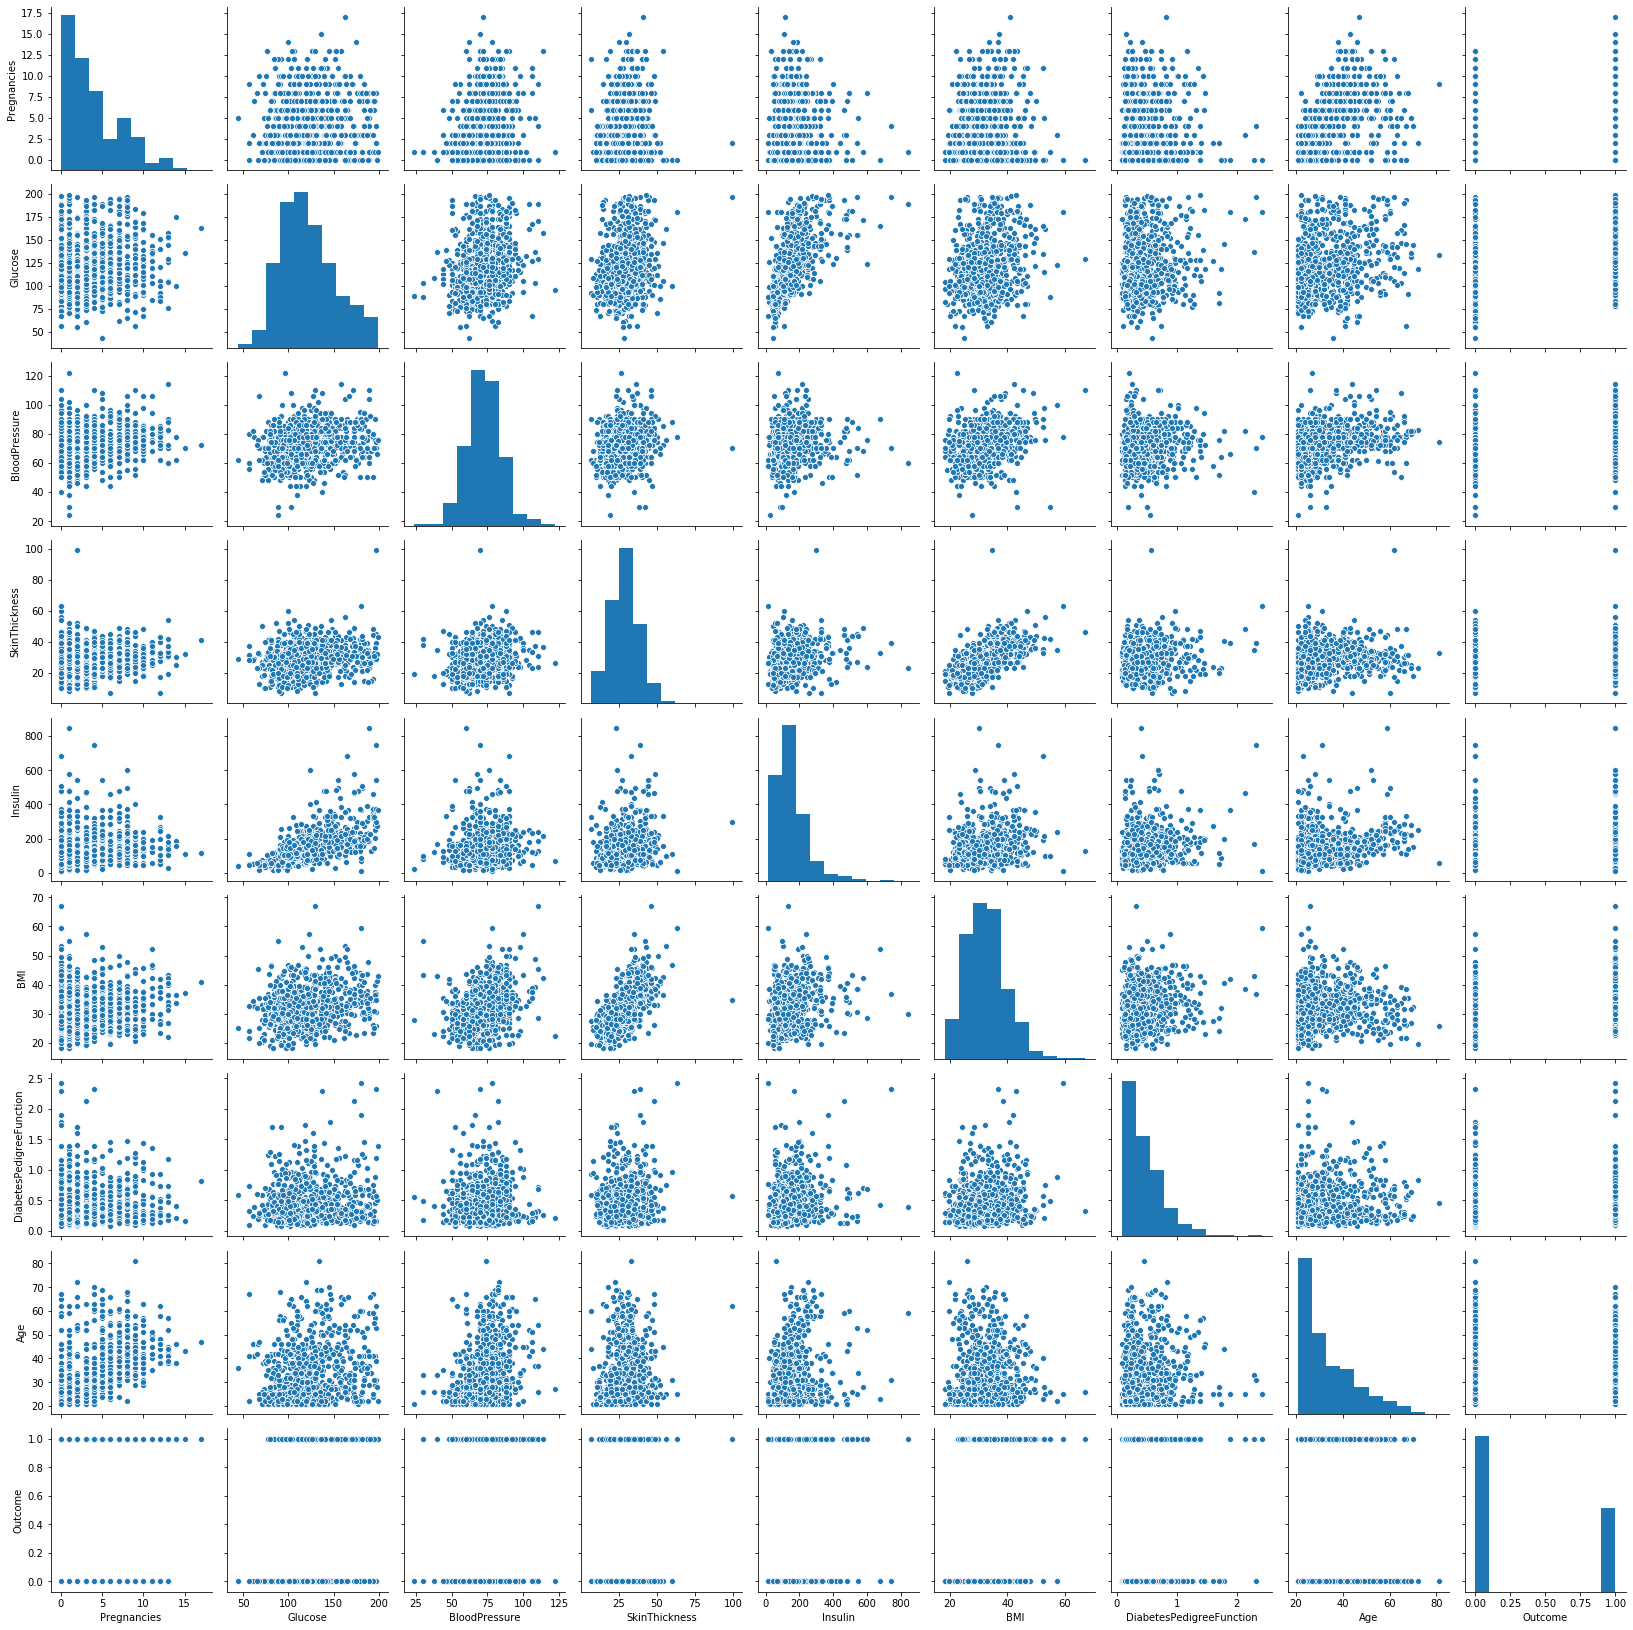

In [14]:
#2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

##We are using seaborn's pairplot as the requirement is to create scatter charts over pairs
import seaborn as sn
sn.pairplot(imputed_data)
plt.show()

##As we can see below we have BMI-SkinThickness, Glucose-Insulin are having linear relation.

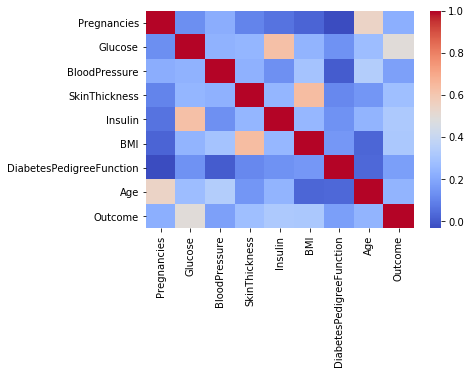

In [15]:
#3. Perform correlation analysis. Visually explore it using a heat map.

sn.heatmap(imputed_data.corr(), cmap='coolwarm')

##From the below heatmap made of correlation matrix data, the previous pairs BMI-SkinThickness, Glucose-Insulin are standing out and adding to 
##those Age-Pregnencies, Glucose-Outcome are also having pretty good correlation. 

In [16]:
#Project Task: Week 3
#Data Modeling:
#1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

##Here we are going to divide the whole dataset into 70,30 for train and test respectively, before that we need to do preprocessing as well
##I'm using standardscalar for that.

train = imputed_data.iloc[:,:-1]
test = imputed_data.iloc[:,-1]

train_kfold = imputed_data.iloc[:,:-1]
test_kfold = imputed_data.iloc[:,-1]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=10)

In [18]:
##I want to use KFold cross validation, but before that i would like to see if dataset is balanced or not if not a straight away kfold will
##underperform

imputed_data.Outcome.value_counts()

##As we can see below its imbalanced data so i will go for StratifiedKFold for uniform distribution.

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [19]:
print("Percentage of '0' in Outcome is", 500/768, "\nPercentage of '1' in Outcome is", 268/768)

Percentage of '0' in Outcome is 0.6510416666666666 
Percentage of '1' in Outcome is 0.3489583333333333


In [20]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True ,random_state=10)
for train_index, test_index in skf.split(train_kfold,test_kfold):
        X_train_kfold, X_test_kfold = train_kfold.iloc[train_index], train_kfold.iloc[test_index] 
        y_train_kfold, y_test_kfold = test_kfold.iloc[train_index], test_kfold.iloc[test_index]

In [21]:
##DABL Simple Classifier() to finding important features and best model
import dabl
dablclassifier = dabl.SimpleClassifier(random_state=10).fit(imputed_data,target_col='Outcome')

Running DummyClassifier()
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.651 average_precision: 0.349 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.394

Running GaussianNB()
accuracy: 0.652 average_precision: 0.570 roc_auc: 0.757 recall_macro: 0.519 f1_macro: 0.454
=== new best GaussianNB() (using recall_macro):
accuracy: 0.652 average_precision: 0.570 roc_auc: 0.757 recall_macro: 0.519 f1_macro: 0.454

Running MultinomialNB()
accuracy: 0.668 average_precision: 0.515 roc_auc: 0.675 recall_macro: 0.577 f1_macro: 0.569
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.668 average_precision: 0.515 roc_auc: 0.675 recall_macro: 0.577 f1_macro: 0.569

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.723 average_precision: 0.513 roc_auc: 0.712 recall_macro: 0.712 f1_macro: 0.704
=== new best DecisionTreeClassifier(class_weight='balanced', 

Depth: 4
Number of leaves: 6


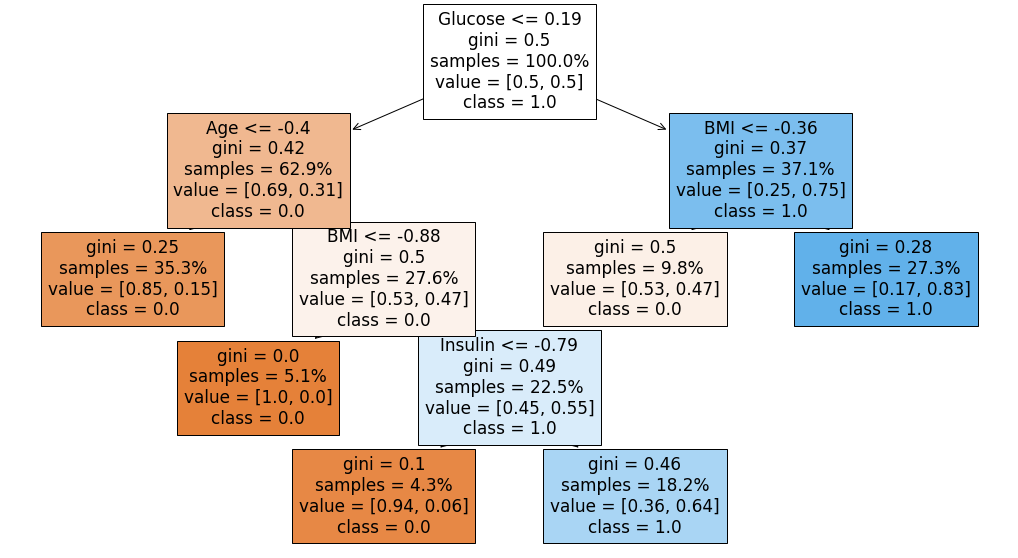

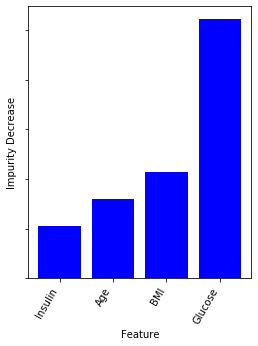

In [22]:
dabl.explain(dablclassifier) #dabl tells us best model is DecisionTreeClassifier with 73% accuracy, 71.8 f1 score

In [23]:
imputed_data.to_excel("healthcare.xlsx") #for creating Tableau charts exporting cleaned dataset

In [24]:
#Lets do the predict on couple other models we know and see which one is giving the best accuracy score 

##SVC
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
svcpred = svcmodel.predict(X_test)
print("Score by simple test-train split",svcmodel.score(X_test,y_test))

svcmodel_cv = SVC()
svcmodel_cv.fit(X_train_kfold, y_train_kfold)
svcpred_cv = svcmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",svcmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7272727272727273
Score by k-fold cross validation 0.76953125


In [25]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrpred = lrmodel.predict(X_test)
print("Score by simple test-train split",lrmodel.score(X_test,y_test))

lrmodel_cv = LogisticRegression()
lrmodel_cv.fit(X_train_kfold, y_train_kfold)
lrpred_cv = lrmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",lrmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7445887445887446
Score by k-fold cross validation 0.7890625


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
##Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nbmodel = BernoulliNB()
nbmodel.fit(X_train, y_train)
nbpred = nbmodel.predict(X_test)
print("Score by simple test-train split",nbmodel.score(X_test,y_test))

nbmodel_cv = BernoulliNB()
nbmodel_cv.fit(X_train_kfold, y_train_kfold)
nbpred_cv = nbmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",nbmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7402597402597403
Score by k-fold cross validation 0.65234375


In [27]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
dtpred = dtmodel.predict(X_test)
print("Score by simple test-train split",dtmodel.score(X_test,y_test))

dtmodel_cv = DecisionTreeClassifier()
dtmodel_cv.fit(X_train_kfold, y_train_kfold)
dtpred_cv = dtmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",dtmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7056277056277056
Score by k-fold cross validation 0.7109375


In [28]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
rfpred = rfmodel.predict(X_test)
print("Score by simple test-train split",rfmodel.score(X_test,y_test))

rfmodel_cv = RandomForestClassifier()
rfmodel_cv.fit(X_train_kfold, y_train_kfold)
rfpred_cv = rfmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",rfmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7532467532467533
Score by k-fold cross validation 0.78515625


In [29]:
##XGBoost
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
xgbpred = xgbmodel.predict(X_test)
print("Score by simple test-train split",xgbmodel.score(X_test,y_test))

xgbmodel_cv = XGBClassifier()
xgbmodel_cv.fit(X_train_kfold, y_train_kfold)
xgbpred_cv = xgbmodel_cv.predict(X_test_kfold)
print("Score by k-fold cross validation",xgbmodel_cv.score(X_test_kfold,y_test_kfold))

C:\Users\pavan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score by simple test-train split 0.7272727272727273
[04:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score by k-fold cross validation 0.76953125


C:\Users\pavan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train, y_train)
knnpred = knnmodel.predict(X_test)
print("Score by simple test-train split",knnmodel.score(X_test,y_test))

knnmodel_cv = KNeighborsClassifier()
knnmodel_cv.fit(X_train_kfold, y_train_kfold)
knnpred_cv = knnmodel.predict(X_test_kfold)
print("Score by k-fold cross validation",knnmodel_cv.score(X_test_kfold,y_test_kfold))

Score by simple test-train split 0.7316017316017316
Score by k-fold cross validation 0.73046875


In [31]:
#Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
##Lets compare all the classifiers results along with KNN
accuracy = {'Model' : ['KNN','XGB','RF','DT','NB','LR','SVC'], 
            'Accuracy_train_test_split' : [knnmodel.score(X_test,y_test),xgbmodel.score(X_test,y_test),rfmodel.score(X_test,y_test),dtmodel.score(X_test,y_test),nbmodel.score(X_test,y_test),lrmodel.score(X_test,y_test),svcmodel.score(X_test,y_test)],
            'Accuracy_kfold' : [knnmodel_cv.score(X_test_kfold,y_test_kfold),xgbmodel_cv.score(X_test_kfold,y_test_kfold),rfmodel_cv.score(X_test_kfold,y_test_kfold),dtmodel_cv.score(X_test_kfold,y_test_kfold),nbmodel_cv.score(X_test_kfold,y_test_kfold),lrmodel_cv.score(X_test_kfold,y_test_kfold),svcmodel_cv.score(X_test_kfold,y_test_kfold)]}
accuracydf = pd.DataFrame(accuracy, columns= ['Model','Accuracy_train_test_split','Accuracy_kfold'])
accuracydf


Model  Accuracy_train_test_split  Accuracy_kfold
0   KNN                   0.731602        0.730469
1   XGB                   0.727273        0.769531
2    RF                   0.753247        0.785156
3    DT                   0.705628        0.710938
4    NB                   0.740260        0.652344
5    LR                   0.744589        0.789062
6   SVC                   0.727273        0.769531

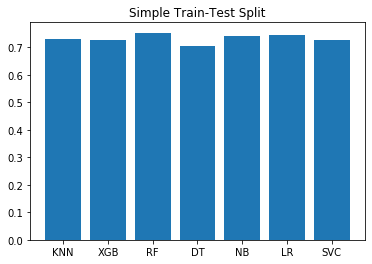

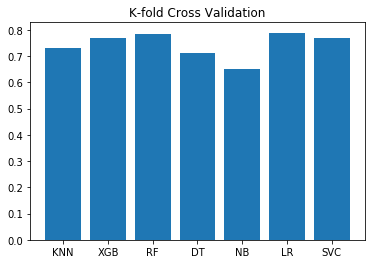

In [32]:
plt.bar(accuracydf.Model,accuracydf['Accuracy_train_test_split'])
plt.title("Simple Train-Test Split")
plt.show()
plt.bar(accuracydf.Model,accuracydf['Accuracy_kfold'])
plt.title("K-fold Cross Validation")
plt.show()
##All the models are predicting around 70%, sigficant differnce can be seen only with Randon Forest, Logistic Regression models when compared 
##to KNN in both the scenaios of Train-Test split and K-Fold as well.

##So from the results using train test split or k-fold we have Random Forest and Logistic Regression are giving high accuracy, So i wanted to 
## do gridsearchCV on these two models and see if i can increase the accuracy further

In [33]:
##GridSearchCV

from sklearn.model_selection import GridSearchCV
lr_params = {'C' : [0.1, 0.01], 'tol' : [0.001, 0.01], 'max_iter' : [1000, 2000]}
rf_params = {'n_estimators' : [25, 50, 100], 'max_depth' : [25, 30], 'min_samples_leaf' : [2,4], 'min_samples_split' : [4, 6, 3]}
rfmodel1 = RandomForestClassifier()
lrmodel1 = LogisticRegression()
grid = zip([lrmodel1, rfmodel1], [lr_params, rf_params])

best_model = None
for model_pipeline, param in grid:
    temp = GridSearchCV(model_pipeline, param_grid=param,cv=10, n_jobs=1)
    temp.fit(X_train, y_train)
    if best_model is None:
        best_model = temp
    else:
        if temp.best_score_ > best_model.best_score_:
            best_model=temp
            
print("*******GridSearchCV Completed*******")
print("Best Model::", best_model.estimator)
print("Parameters for Best Model are::", best_model.best_params_)
print("Best Score::", best_model.best_score_)

##Best accuracy is still 78.5 percent.

*******GridSearchCV Completed*******
Best Model:: RandomForestClassifier()
Parameters for Best Model are:: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Best Score:: 0.7857442348008385


In [34]:
#Project Task: Week 4
#Data Modeling:
#1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values 
#of these parameter you have used.

##Lets calculate the above parameters usinf classinfication report and confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix

##SVM
print("SVM::")
print(classification_report(y_test,svcpred))

svc_cm = confusion_matrix(y_test, svcpred)
print("Confusion Matrix::\n", svc_cm)

Sensitivity_svc = svc_cm[0,0]/(svc_cm[0,0]+svc_cm[0,1])
Specificity_svc = svc_cm[1,1]/(svc_cm[1,1]+svc_cm[1,0])
print("Sensitivity::\n", Sensitivity_svc)
print("Specificity::\n", Specificity_svc)

##LR
print("\n")
print("LR::")
print(classification_report(y_test,lrpred))

lr_cm = confusion_matrix(y_test, lrpred)
print("Confusion Matrix::\n", lr_cm)

Sensitivity_lr = lr_cm[0,0]/(lr_cm[0,0]+lr_cm[0,1])
Specificity_lr = lr_cm[1,1]/(lr_cm[1,1]+lr_cm[1,0])
print("Sensitivity::\n", Sensitivity_lr)
print("Specificity::\n", Specificity_lr)

##NB
print("\n")
print("NB::")
print(classification_report(y_test,nbpred))

nb_cm = confusion_matrix(y_test, nbpred)
print("Confusion Matrix::\n", nb_cm)

Sensitivity_nb = nb_cm[0,0]/(nb_cm[0,0]+nb_cm[0,1])
Specificity_nb = nb_cm[1,1]/(nb_cm[1,1]+nb_cm[1,0])
print("Sensitivity::\n", Sensitivity_nb)
print("Specificity::\n", Specificity_nb)

##DT
print("\n")
print("DT::")
print(classification_report(y_test,dtpred))

dt_cm = confusion_matrix(y_test, dtpred)
print("Confusion Matrix::\n", dt_cm)

Sensitivity_dt = dt_cm[0,0]/(dt_cm[0,0]+dt_cm[0,1])
Specificity_dt = dt_cm[1,1]/(dt_cm[1,1]+dt_cm[1,0])
print("Sensitivity::\n", Sensitivity_dt)
print("Specificity::\n", Specificity_dt)

##RF
print("\n")
print("RF::")
print(classification_report(y_test,rfpred))

rf_cm = confusion_matrix(y_test, rfpred)
print("Confusion Matrix::\n", rf_cm)

Sensitivity_rf = rf_cm[0,0]/(rf_cm[0,0]+rf_cm[0,1])
Specificity_rf = rf_cm[1,1]/(rf_cm[1,1]+rf_cm[1,0])
print("Sensitivity::\n", Sensitivity_rf)
print("Specificity::\n", Specificity_rf)

##XGB
print("\n")
print("XGB::")
print(classification_report(y_test,xgbpred))

xgb_cm = confusion_matrix(y_test, xgbpred)
print("Confusion Matrix::\n", xgb_cm)

Sensitivity_xgb = xgb_cm[0,0]/(xgb_cm[0,0]+xgb_cm[0,1])
Specificity_xgb = xgb_cm[1,1]/(xgb_cm[1,1]+xgb_cm[1,0])
print("Sensitivity::\n", Sensitivity_xgb)
print("Specificity::\n", Specificity_xgb)

##KNN
print("\n")
print("KNN::")
print(classification_report(y_test,knnpred))

knn_cm = confusion_matrix(y_test, knnpred)
print("Confusion Matrix::\n", knn_cm)

Sensitivity_knn = knn_cm[0,0]/(knn_cm[0,0]+knn_cm[0,1])
Specificity_knn = knn_cm[1,1]/(knn_cm[1,1]+knn_cm[1,0])
print("Sensitivity::\n", Sensitivity_knn)
print("Specificity::\n", Specificity_knn)

SVM::
              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80       144
         1.0       0.71      0.47      0.57        87

    accuracy                           0.73       231
   macro avg       0.72      0.68      0.68       231
weighted avg       0.72      0.73      0.71       231

Confusion Matrix::
 [[127  17]
 [ 46  41]]
Sensitivity::
 0.8819444444444444
Specificity::
 0.47126436781609193


LR::
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       144
         1.0       0.73      0.52      0.60        87

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231

Confusion Matrix::
 [[127  17]
 [ 42  45]]
Sensitivity::
 0.8819444444444444
Specificity::
 0.5172413793103449


NB::
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     

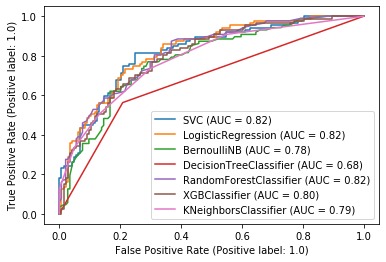

In [35]:
##Creating ROC graph for all the models 
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
plot_roc_curve(svcmodel, X_test, y_test, ax=ax)
plot_roc_curve(lrmodel, X_test, y_test, ax=ax)
plot_roc_curve(nbmodel, X_test, y_test, ax=ax)
plot_roc_curve(dtmodel, X_test, y_test, ax=ax)
plot_roc_curve(rfmodel, X_test, y_test, ax=ax)
plot_roc_curve(xgbmodel, X_test, y_test, ax=ax)
plot_roc_curve(knnmodel, X_test, y_test, ax=ax)
plt.show()

In [36]:
Report = {'Model' : ['KNN','XGB','RF','DT','NB','LR','SVC'], 
            'Accuracy_train_test_split' : accuracydf.Accuracy_train_test_split,
            'Accuracy_kfold' : accuracydf.Accuracy_kfold,
            'Precision' : [0.72, 0.71, 0.74,0.69,0.72,0.74, 0.72],
            'Recall' : [0.69, 0.69, 0.70, 0.68, 0.72, 0.70, 0.68],
            'Sensitivity' : [0.86, 0.84, 0.88,0.79,0.79,0.88, 0.88],
            'Specificity' : [0.50, 0.51, 0.50,0.56,0.64,0.51, 0.47],
            'F1 Score' : [0.69, 0.69, 0.71, 0.68, 0.72, 0.71, 0.68],
            'AUC' : [0.79, 0.8, 0.82, 0.68, 0.78, 0.82, 0.82]
            }
Reportdf = pd.DataFrame(Report, columns=['Model', 'Accuracy_train_test_split', 'Accuracy_kfold', 'Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC'])
Reportdf

##From the below dataframe we can see in terms of Accuracy Random Forest is highest, Also in Precision, AUC as well
##When coming to recall we can see Naive bayes is highest, Also in F1 Score
##Coming to Sensitivity Random Forest is highest which helps when we need accurate True Positivity
##Finally Specificity we have Naive bayes is highest which helps when we looking for high accurate True Negativity

Model  Accuracy_train_test_split  Accuracy_kfold  Precision  Recall  \
0   KNN                   0.731602        0.730469       0.72    0.69   
1   XGB                   0.727273        0.769531       0.71    0.69   
2    RF                   0.753247        0.785156       0.74    0.70   
3    DT                   0.705628        0.710938       0.69    0.68   
4    NB                   0.740260        0.652344       0.72    0.72   
5    LR                   0.744589        0.789062       0.74    0.70   
6   SVC                   0.727273        0.769531       0.72    0.68   

   Sensitivity  Specificity  F1 Score   AUC  
0         0.86         0.50      0.69  0.79  
1         0.84         0.51      0.69  0.80  
2         0.88         0.50      0.71  0.82  
3         0.79         0.56      0.68  0.68  
4         0.79         0.64      0.72  0.78  
5         0.88         0.51      0.71  0.82  
6         0.88         0.47      0.68  0.82